In [20]:
# imports
import pandas as pd
import numpy as np

In [21]:
# read data
df = pd.read_csv('../data/control_statistics.csv')
match_info = pd.read_csv('../data/match_info.csv')

In [22]:
# head
df.head(1)

,tournament_id,match_id,period,homeTeamControlDuration,awayTeamControlDuration,contestedControlDuration,looseDuration
0,57,1257,1,238.92,166.08,53.28,233.34


In [23]:
df['control_duration'] = df['awayTeamControlDuration'] + df['homeTeamControlDuration'] + df['contestedControlDuration'] + df['looseDuration']
df['homeTeamControlPercentage'] = df['homeTeamControlDuration'] / df['control_duration']
df['awayTeamControlPercentage'] = df['awayTeamControlDuration'] / df['control_duration']
df['contestedControlPercentage'] = df['contestedControlDuration'] / df['control_duration']
df['looseControlPercentage'] = df['looseDuration'] / df['control_duration']

In [24]:
# merge with match info
df = df.merge(match_info, on='match_id', how='right')

In [25]:
df = df[['homeTeamControlPercentage', 
         'awayTeamControlPercentage',  
         'home_team_int', 
         'away_team_int']]
df

,homeTeamControlPercentage,awayTeamControlPercentage,home_team_int,away_team_int
0,0.407279,0.249149,1,0
1,0.273615,0.356121,1,0
2,0.338450,0.323764,1,0
3,0.381866,0.238748,1,0
4,0.397250,0.298882,0,0
...,...,...,...,...
790,0.183308,0.478418,0,1
791,0.301458,0.339722,0,0
792,0.313102,0.322298,0,0
793,0.353805,0.312075,1,1


In [26]:
import pandas as pd

# Assuming your DataFrame is named df
df['match_type'] = df['home_team_int'] + df['away_team_int']

# Optionally map to strings for clarity
df['match_type_label'] = df['match_type'].map({
    0: 'Domestic',
    1: 'Mixed',
    2: 'International'
})


In [27]:
# Create a long-form dataframe for easier analysis
df_long = pd.DataFrame({
    'team': ['home'] * len(df) + ['away'] * len(df),
    'control_pct': pd.concat([df['homeTeamControlPercentage'], df['awayTeamControlPercentage']]).reset_index(drop=True),
    'is_int': pd.concat([df['home_team_int'], df['away_team_int']]).reset_index(drop=True),
    'match_type': pd.concat([df['match_type']] * 2).reset_index(drop=True),
    'match_type_label': pd.concat([df['match_type_label']] * 2).reset_index(drop=True)
})


In [28]:
avg_control_by_int = df_long.groupby('is_int')['control_pct'].mean()
print(avg_control_by_int)


is_int
0    0.303352
1    0.316456
Name: control_pct, dtype: float64


In [29]:
avg_control_by_match_type = df_long.groupby('match_type_label')['control_pct'].mean()
print(avg_control_by_match_type)


match_type_label
Domestic         0.307547
International    0.306084
Mixed            0.308232
Name: control_pct, dtype: float64


In [30]:
cross_comparison = df_long.groupby(['match_type_label', 'is_int'])['control_pct'].mean().unstack()
print(cross_comparison)


is_int                   0         1
match_type_label                    
Domestic          0.307547       NaN
International          NaN  0.306084
Mixed             0.296549  0.319914


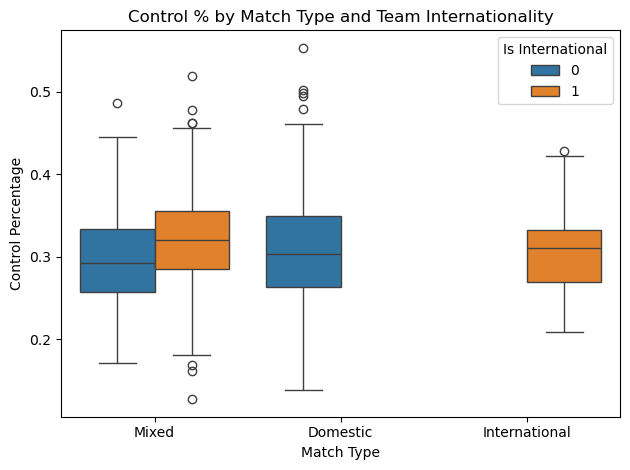

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='match_type_label', y='control_pct', hue='is_int', data=df_long)
plt.title('Control % by Match Type and Team Internationality')
plt.ylabel('Control Percentage')
plt.xlabel('Match Type')
plt.legend(title='Is International')
plt.tight_layout()
plt.show()
